# Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

In this dataset we predict the insurance costs

In [56]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

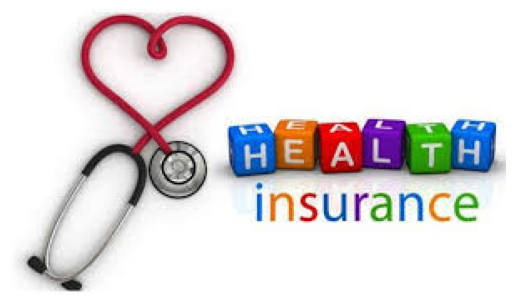

In [57]:
from PIL import Image
import matplotlib.pyplot as plt  # For displaying the image using matplotlib

# Define the image file path using a raw string (prefix with 'r')
image_path = "C:/Users/ssour/Downloads/download (5).jpeg"

# Open an image file
img = Image.open(image_path)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axes for image display
plt.show()

# Importing Datasets

In [58]:
# Read datasets
df=pd.read_csv("medical cost insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


These datasets contain the data of medical cost insurance . On the basis of the data we have to predict the insurance costs.

These datasets contain the data like "Age","Sex","Bmi", "Children","Smoker","Region","Charges". in medical cost insurance in this datsets my "Charges"columns is target variable.

In [59]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [60]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [61]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory data analysis

In [62]:
# Checking the dimension of the dataset
df.shape

(1338, 7)

In [63]:
print("The dimensions of the dataset: ",df.shape)
print("The column headers :",df.columns)

The dimensions of the dataset:  (1338, 7)
The column headers : Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Here we can see that in this datasets contain 1338 rows and 7 columns.

In [64]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [65]:
# checking the types of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [67]:
# Now checking null values in this dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Here we can see that there is no null vlaues present in this datasets

In [68]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [69]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [70]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [71]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As we clear see that there is no null value present in this datasets

<Axes: >

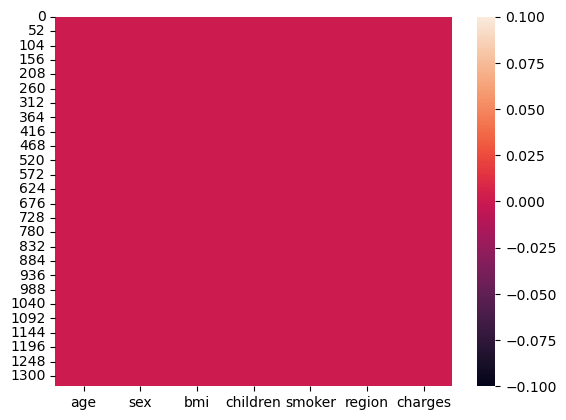

In [73]:
# Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [74]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

Here is the detail of this datsets in numercial form

In [75]:
# Separating Numerical and Categorical Columns

# Checking for categorical Coumns
categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical_col.append(i)
print("Categorical Columns: ",categorical_col)
print("\n")

# Checking for numerical columns
numerical_col = []
for i  in df.dtypes.index:
    if df.dtypes[i]!= "object":
        numerical_col.append(i)
print("Numerical Columns: ",numerical_col)

Categorical Columns:  ['sex', 'smoker', 'region']


Numerical Columns:  ['age', 'bmi', 'children', 'charges']


Here can clear see that there is three columns contain Categorical Data and four column contain numerical data

In [76]:
# Checking number of uniqie values in ech column
df.nunique().to_frame("No. of unique values")

,No. of unique values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


# Checking duplicates in DataFrame

In [77]:
print("Total Duplicates Rows are ",df.duplicated().sum())

Total Duplicates Rows are  1


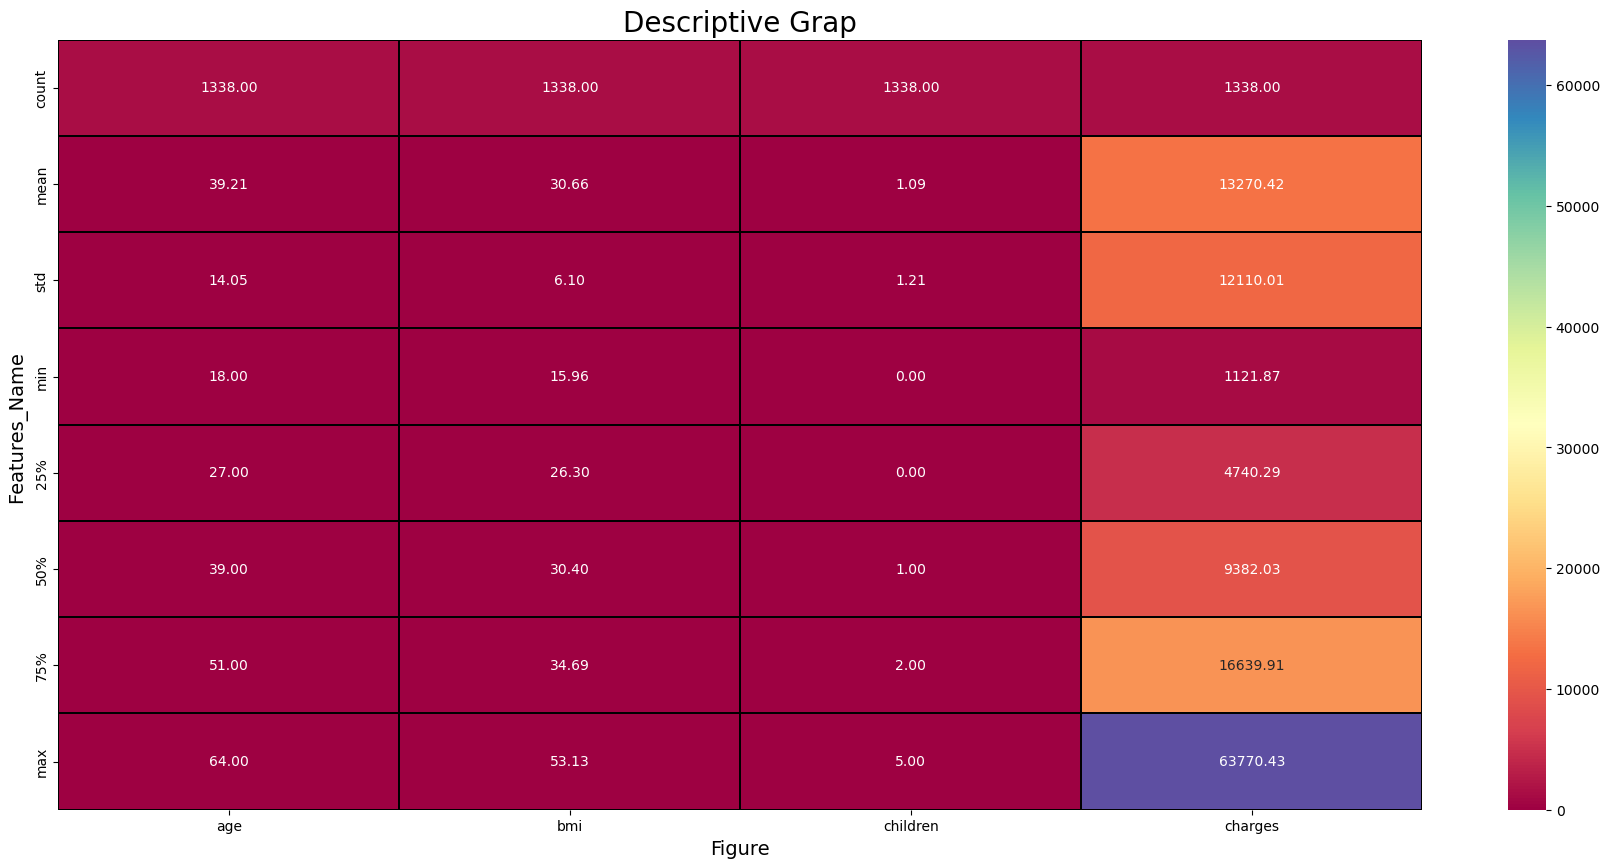

In [78]:
plt.figure(figsize = (22,10))
sns.heatmap(df.describe(),annot = True ,fmt = '0.2f',linewidth = .2,linecolor = 'black', cmap = "Spectral")
plt.xlabel('Figure',fontsize = 14)
plt.ylabel('Features_Name ',fontsize = 14)
plt.title("Descriptive Grap" , fontsize=20)
plt.show()

# Visualize the data

male      676
female    662
Name: sex, dtype: int64


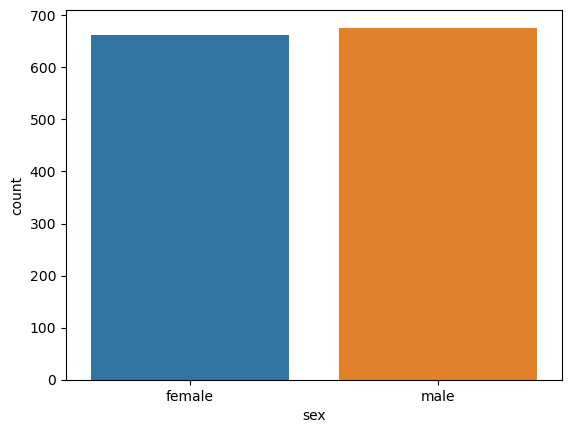

In [79]:
# visualize the number of  people
ax=sns.countplot(x='sex',data=df)
print(df['sex'].value_counts())

As you can see, both male and female are same .But male is more  as comapared to female

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


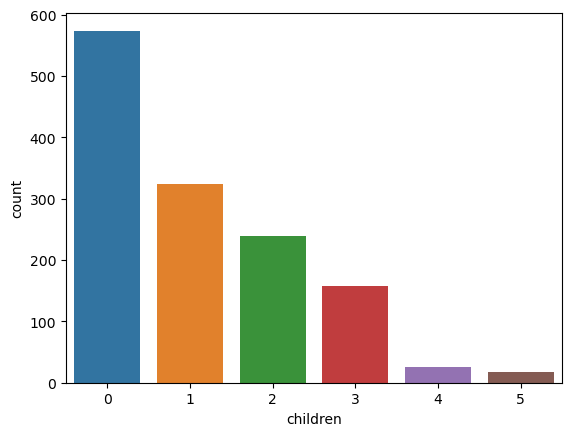

In [80]:
# visualize the number of children 
ax=sns.countplot(x='children',data=df)
print(df['children'].value_counts())

The 'children' column in the Medical Cost Insurance dataset represents children which represents the number of children a policy holder has who are under the age of 18. If this column is filled as '0', it means that the policy holder has no children. Whereas if it is filled as '1', '2', '3' etc., it shows that the policy holder has that number of children.

But in this datasets whose policy holder children is "Zero" is more as to compared to other policy holder

no     1064
yes     274
Name: smoker, dtype: int64


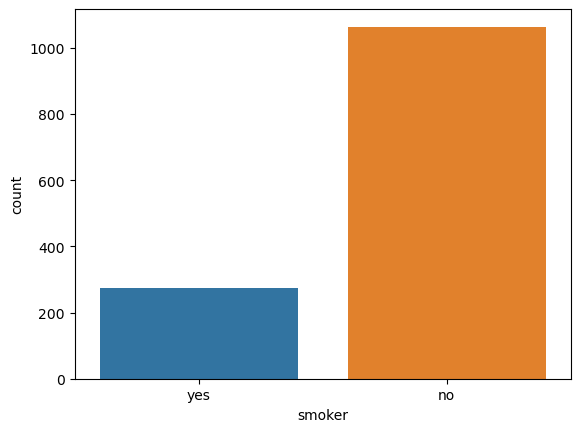

In [81]:
# visualize the number of smoker
ax=sns.countplot(x='smoker',data=df)
print(df['smoker'].value_counts())

The 'smoker' column in the Medical Cost Insurance dataset provides information about smoking. This column indicates whether the person smokes or not. If a person has a habit of smoking, they are labeled as a 'smoker'. This information can be used in calculating insurance premiums or in the transfer process, as individuals who smoke may be expected to have higher medical expenses.

But in this data set, non-smokers are more likely to smoke than smokers.

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


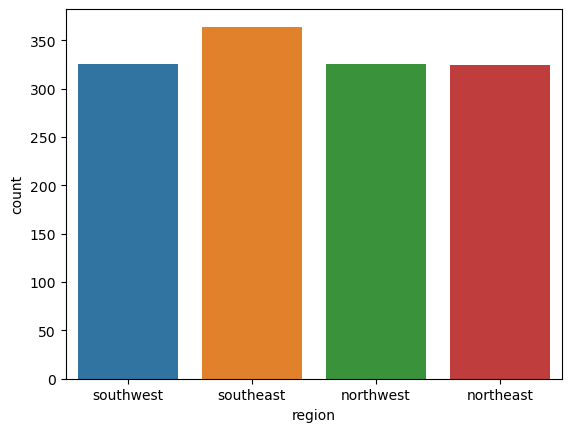

In [30]:
# visualize the number of region
ax=sns.countplot(x='region',data=df)
print(df['region'].value_counts())

In "region" column typically indicates the geographic region where the insured individual resides or is covered under the insurance plan.
Here we can see that for those people who lives in southeast is getting more insurance as compared to other

In [32]:
# Here we check the maximum and minimum quality rate
print("Min. Charges taken from insurance:", df.charges.min())
print("Max Charges taken from insurance: ",df["charges"].max())

Min. Charges taken from insurance: 1121.8739
Max Charges taken from insurance:  63770.42801


Here we can in this datsets has lowest charge is 1121 and highest charges is 63770

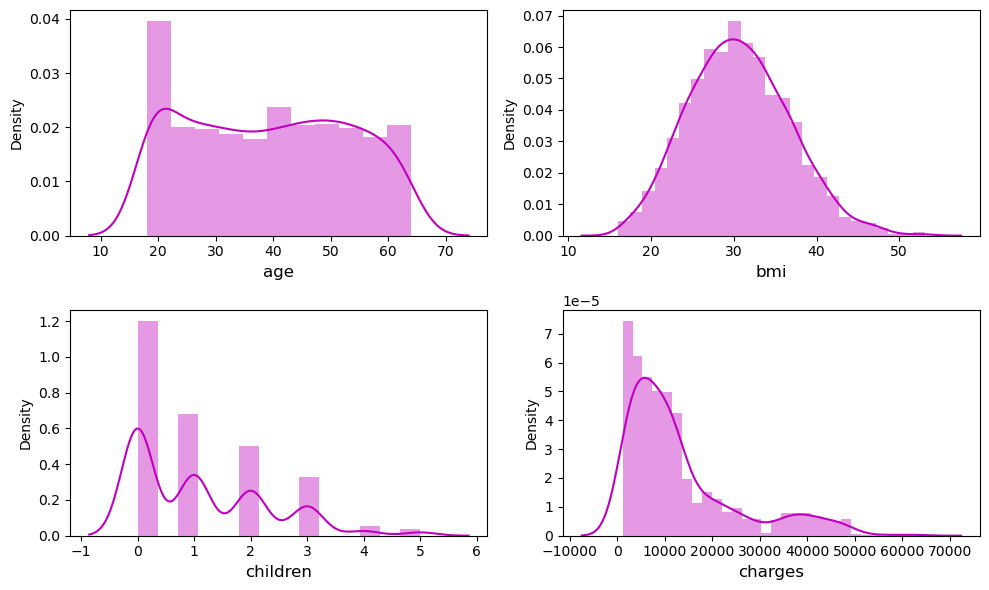

In [33]:
# lets check the how the data has been distributed in remaining column
plt.figure(figsize=(10,6),facecolor= 'white')
plotnumber=1
for col in numerical_col:
    ax=plt.subplot(2,2,plotnumber)
    sns.distplot(df[col],color="m")
    plt.xlabel(col,fontsize=12)
    plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Relation Analysis

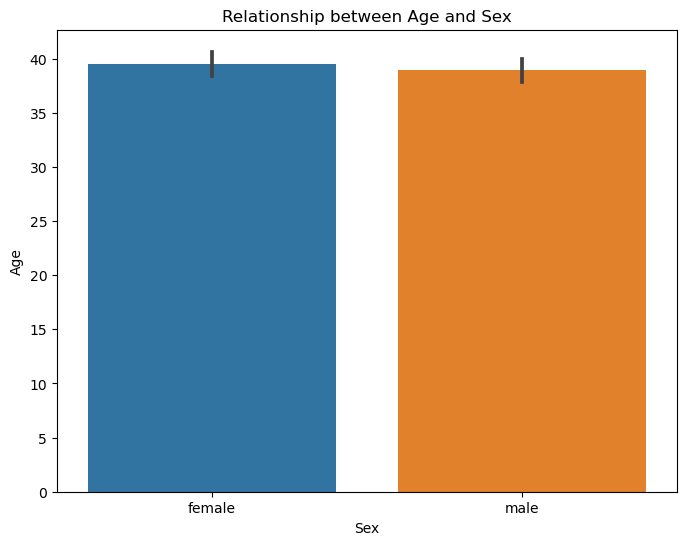

In [35]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="sex", y="age", data=df)

# Set labels and title
plt.xlabel("Sex")
plt.ylabel("Age")
plt.title("Relationship between Age and Sex")

# Show the plot
plt.show()

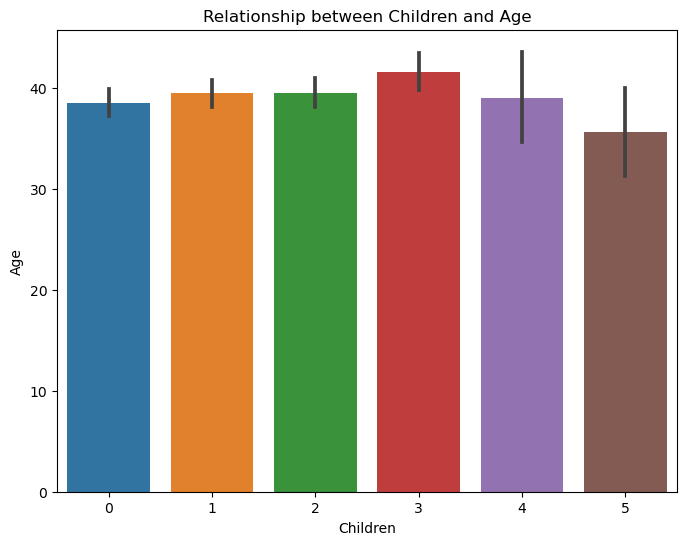

In [37]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="children", y="age", data=df)

# Set labels and title
plt.xlabel("Children")
plt.ylabel("Age")
plt.title("Relationship between Children and Age")

# Show the plot
plt.show()

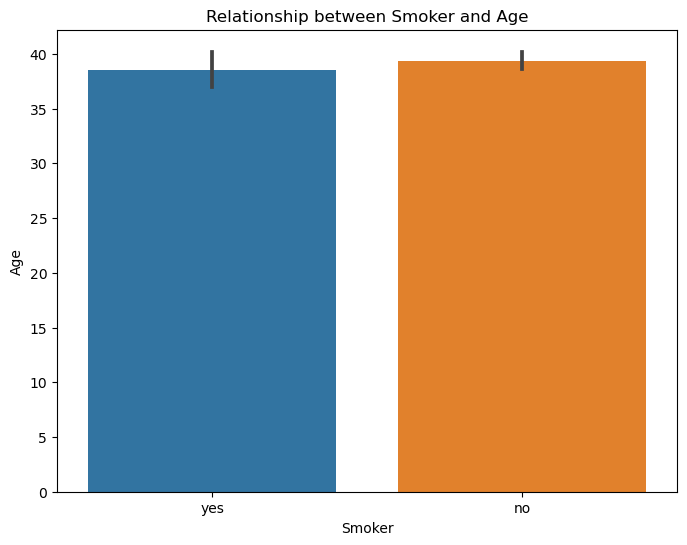

In [38]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="smoker", y="age", data=df)

# Set labels and title
plt.xlabel("Smoker")
plt.ylabel("Age")
plt.title("Relationship between Smoker and Age")

# Show the plot
plt.show()

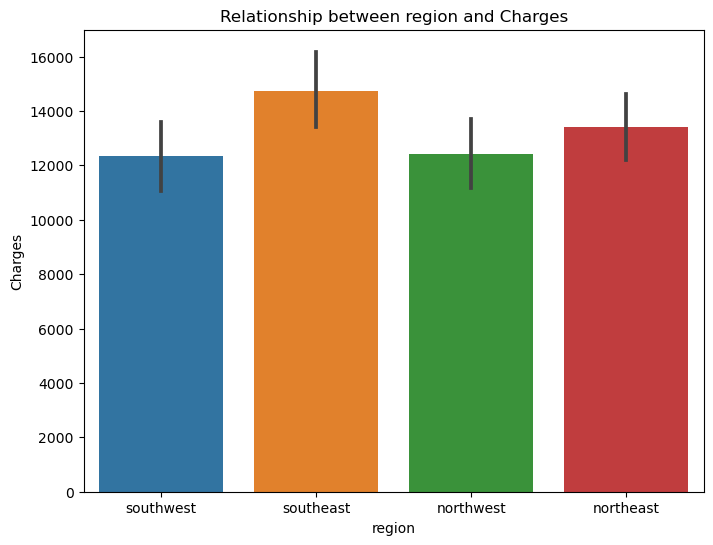

In [39]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="region", y="charges", data=df)

# Set labels and title
plt.xlabel("region")
plt.ylabel("Charges")
plt.title("Relationship between region and Charges")

# Show the plot
plt.show()

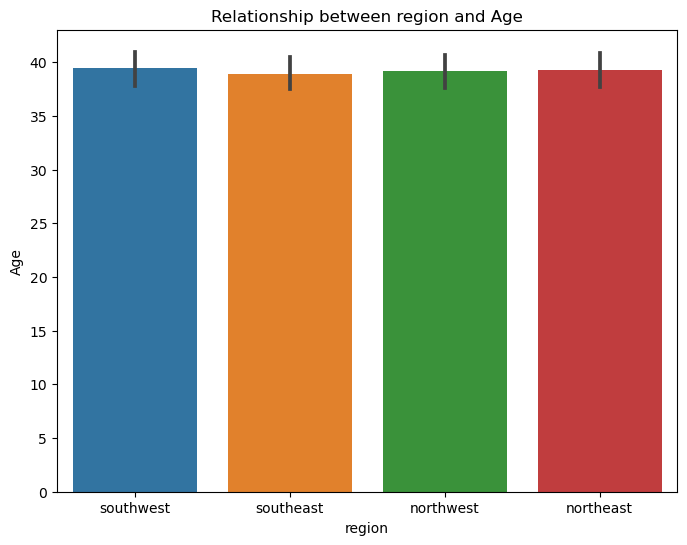

In [40]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="region", y="age", data=df)

# Set labels and title
plt.xlabel("region")
plt.ylabel("Age")
plt.title("Relationship between region and Age")

# Show the plot
plt.show()

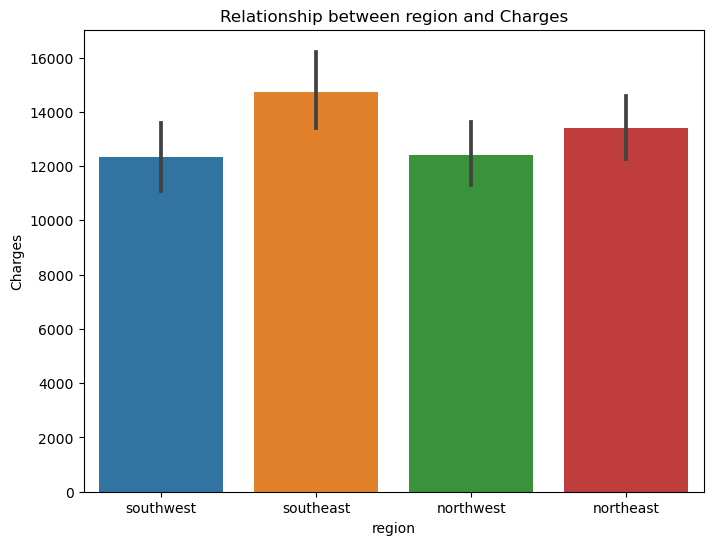

In [41]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="region", y="charges", data=df)

# Set labels and title
plt.xlabel("region")
plt.ylabel("Charges")
plt.title("Relationship between region and Charges")

# Show the plot
plt.show()

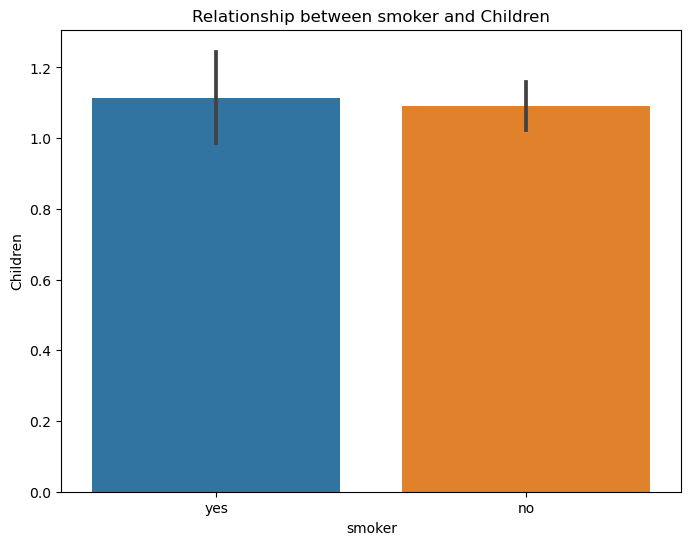

In [42]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Create the bar plot
sns.barplot(x="smoker", y="children", data=df)

# Set labels and title
plt.xlabel("smoker")
plt.ylabel("Children")
plt.title("Relationship between smoker and Children")

# Show the plot
plt.show()

# Multivariate analysis

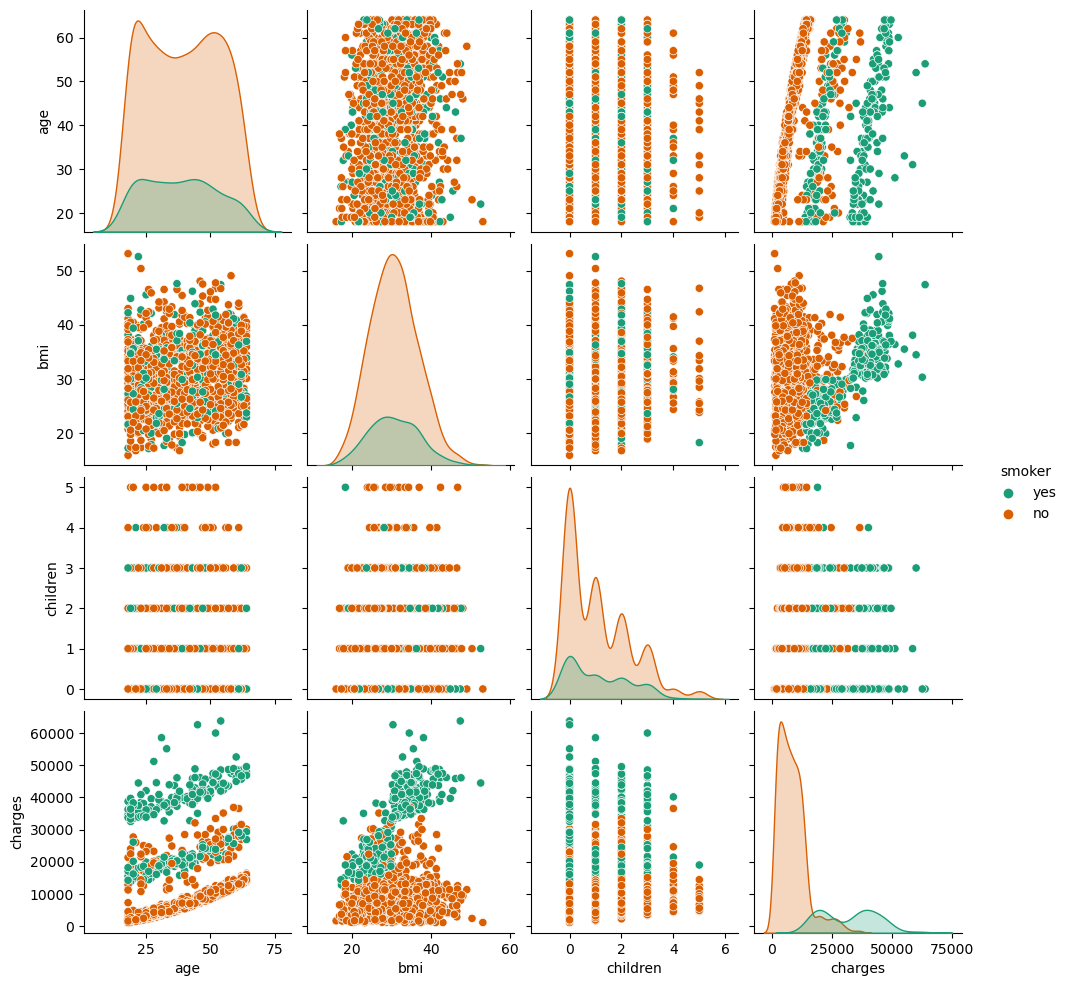

In [43]:
sns.pairplot(df,hue = "smoker",palette="Dark2")
plt.show()

# Checking for outliers

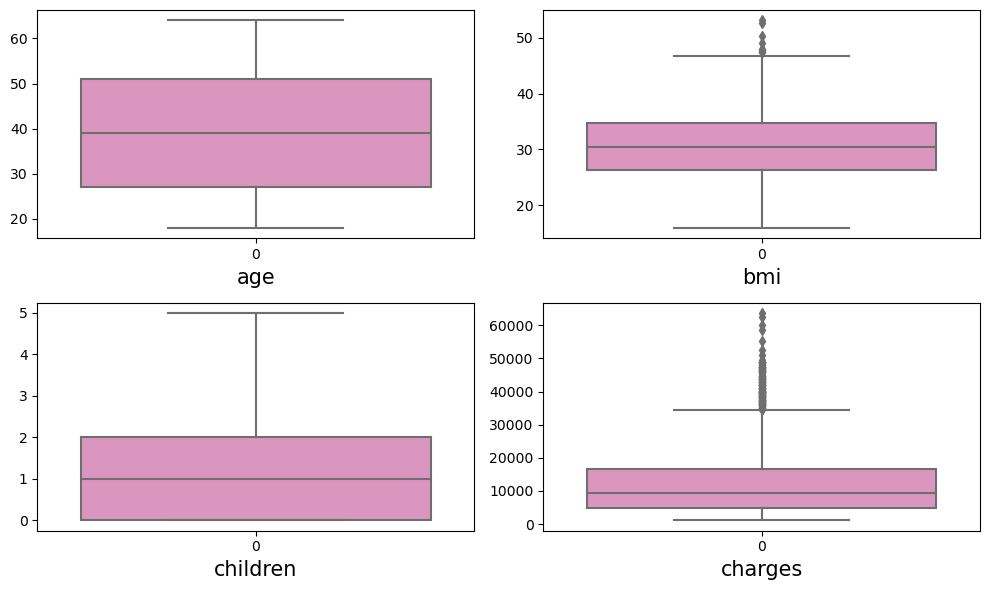

In [82]:
# lets check the outliers by plotting boxplot

plt.figure(figsize=(10,6),facecolor="white")
plotnumber=1
for col in numerical_col:
    if plotnumber <=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col],palette="Set2_r")
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation = 0 , fontsize= 10)
        plotnumber+=1
plt.tight_layout()

Here we can see that there are two column has outliers but the charges columns is my target variable so no need to changes but in bmi has also outliers so now we will remove outliers .

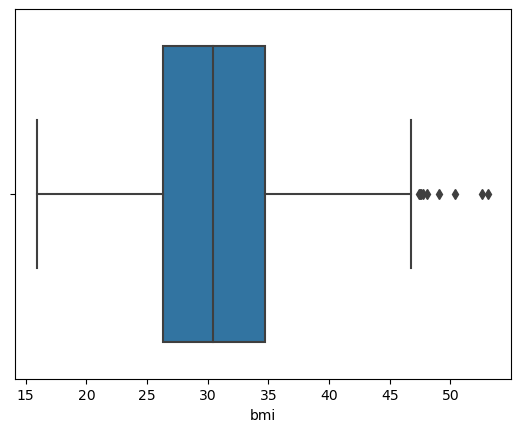

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Checking outliers for 'bmi' using boxplot
sns.boxplot(x=df['bmi'])
plt.show()


# Using IQR method to remove outliers

In [84]:
# Calculate IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df.loc[(df['bmi'] < lower_bound) | (df['bmi'] > upper_bound)]

# Remove outliers
df1 = df.loc[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]

# Print cleaned DataFrame
print("DataFrame after removing outliers:")
print(df1)

# Optional: Print removed outliers
print("\nOutliers removed:")
print(outliers)

DataFrame after removing outliers:
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1329 rows x 7 columns]

Outliers removed:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeas

Here we can see that we have removed the outliers and the df is now converted new data which is df1 here we also loss some data now check 

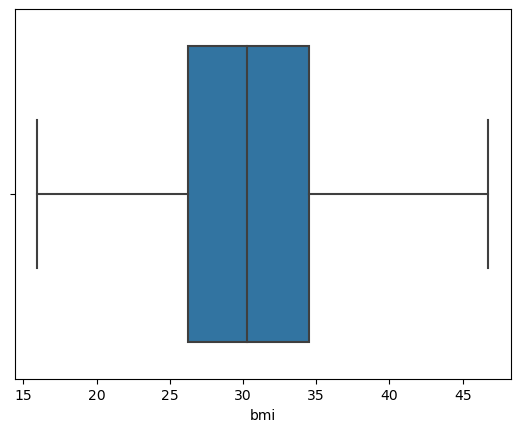

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Checking outliers for 'age' using boxplot
sns.boxplot(x=df1['bmi'])
plt.show()

Here we can also see that the bmi has no extra outlier present after remove the outliers its looks like perfect

In [86]:
# New seperate names 
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Now the data df is converted into df1

In [87]:
print("Old DataFrame- ",df.shape[0])  # old datframe
print("New Data Frame- ",df1.shape[0])  # new dataframe

Old DataFrame-  1338
New Data Frame-  1329


In [88]:
# Calculate the data loss
data_loss = df1.shape[0] - df.shape[0], df1.shape[1] - df.shape[1]

# Print the data loss message
print("Data loss:", data_loss)

Data loss: (-9, 0)


Here we can see that by removing the outliers , our 9 rows were also removed.

In [89]:
print("Data Loss Percentage- ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage-  0.672645739910314


Here we can see percentage loss

# Now checking skewness

In [90]:
# Encoding categorical columns using OrdinalEnocoder
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes =="object":
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


Here the sex column converted into numerical value where
0 indicate "Female" and 1 indicate "Male"  and 
smoker column yes indicate 1 and no indicate 0  and
Region column  here 3 is indicate "SouthWest",2 is indicate "southeast", 1 is indicate "northwest" 
and 0 is "northeast"

In [91]:
# Now all data are converted into numercial form so no we check skewness
df1.skew()

age         0.058413
sex        -0.016573
bmi         0.157180
children    0.936628
smoker      1.471424
region     -0.031651
charges     1.500577
dtype: float64

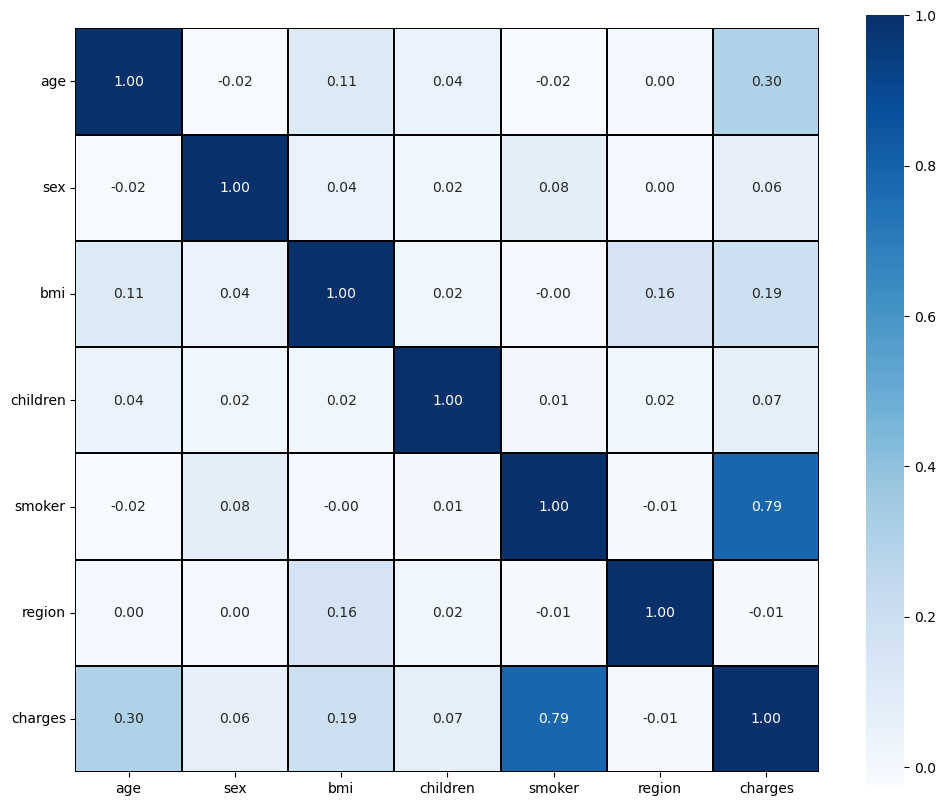

In [92]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(df1.corr(), 
            annot=True,        # Show correlation values on the heatmap
            cmap="Blues",      # Set the color map to 'Blues'
            linewidths=0.1,    # Set width between cells
            linecolor='black', # Color of the lines separating cells
            fmt='.2f',         # Format of annotations (2 decimal places)
            square=True)       # Ensure cells are square-shaped

# Rotate y-axis labels to be horizontal
plt.yticks(rotation=0)

# Display the heatmap
plt.show()


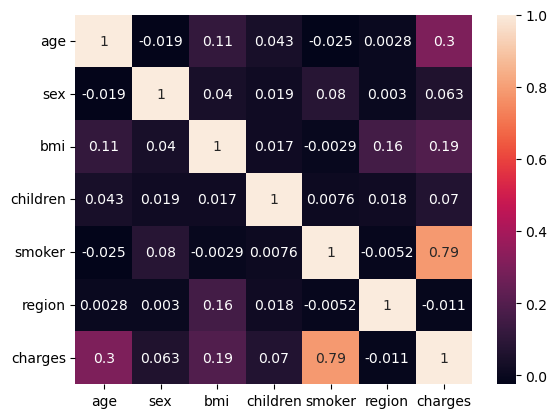

In [93]:
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Now we check how data is distributed

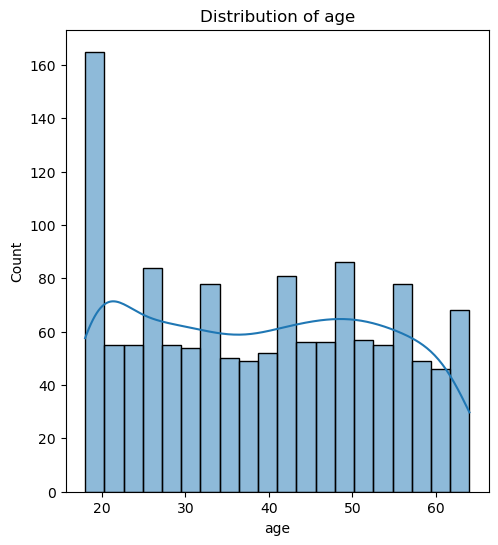

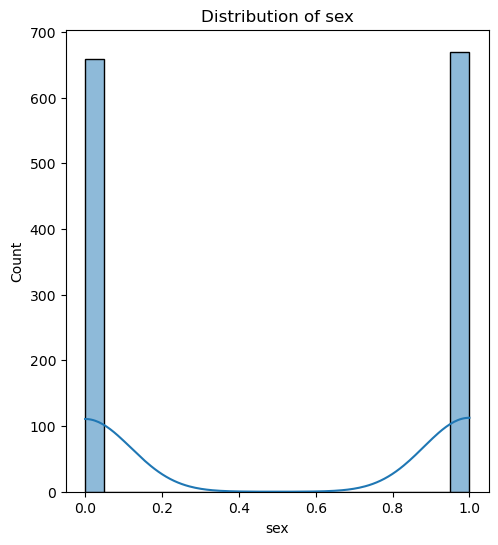

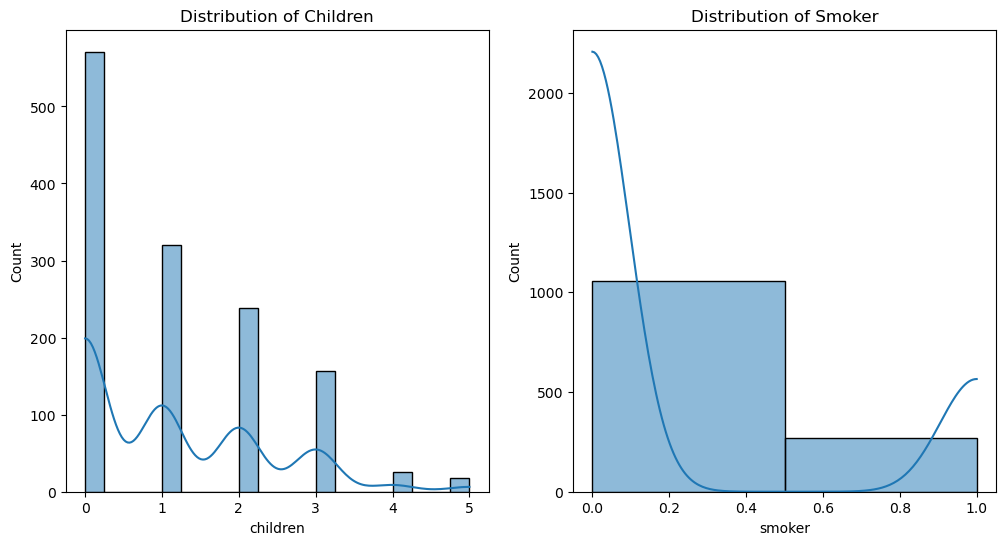

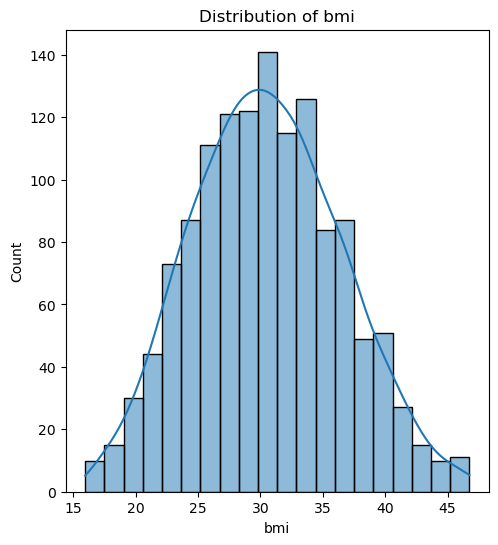

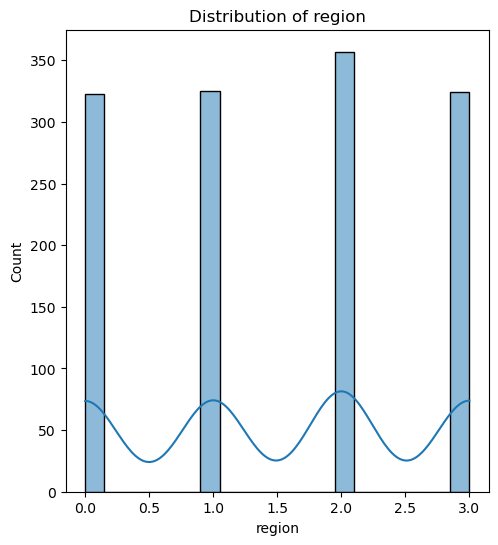

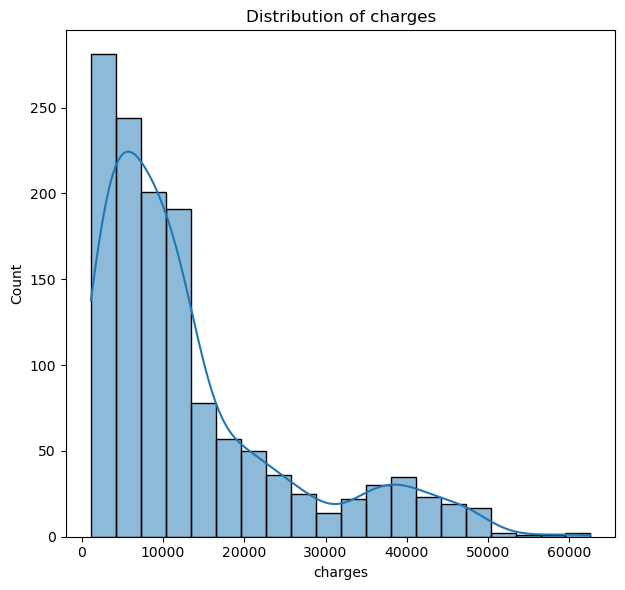

In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Visualize distribution of age,,'sex','children','smoker','bmi','region','log_charges' columns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['age'], bins=20, kde=True)
plt.title('Distribution of age')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['sex'], bins=20, kde=True)
plt.title('Distribution of sex')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['children'], bins=20, kde=True)
plt.title('Distribution of Children')


plt.subplot(1, 2, 2)
sns.histplot(df1['smoker'], bins=2, kde=True)
plt.title('Distribution of Smoker')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['bmi'], bins=20, kde=True)
plt.title('Distribution of bmi')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['region'], bins=20, kde=True)
plt.title('Distribution of region')


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df1['charges'], bins=20, kde=True)
plt.title('Distribution of charges')


plt.tight_layout()
plt.show()


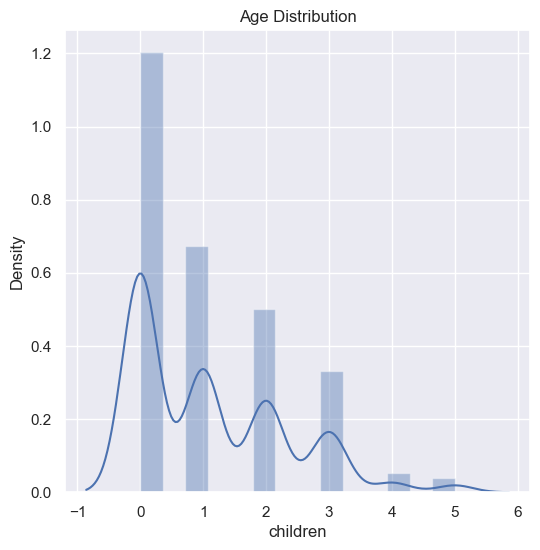

In [95]:
# Plotting the distribution of children columns
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df1['children'])
plt.title("Age Distribution")
plt.show()

In [96]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,0.504138,30.537348,1.096313,0.203913,1.513168,13212.333374
std,14.047835,0.500171,5.919946,1.207928,0.403057,1.106532,11997.236429
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4738.268200
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9361.326800
75%,51.000000,1.000000,34.485000,2.000000,0.000000,2.000000,16586.497710
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,62592.873090


After encoding the categorical columns we can see all columns details here.The counts of all columns are same that means now no null values are present in this datasets.

# Correlation 

In [97]:
cor=df1.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.302022
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.063394
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.193196
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,0.069739
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.785912
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,-0.010730
charges,0.302022,0.063394,0.193196,0.069739,0.785912,-0.010730,1.000000


# Correlation between label and features

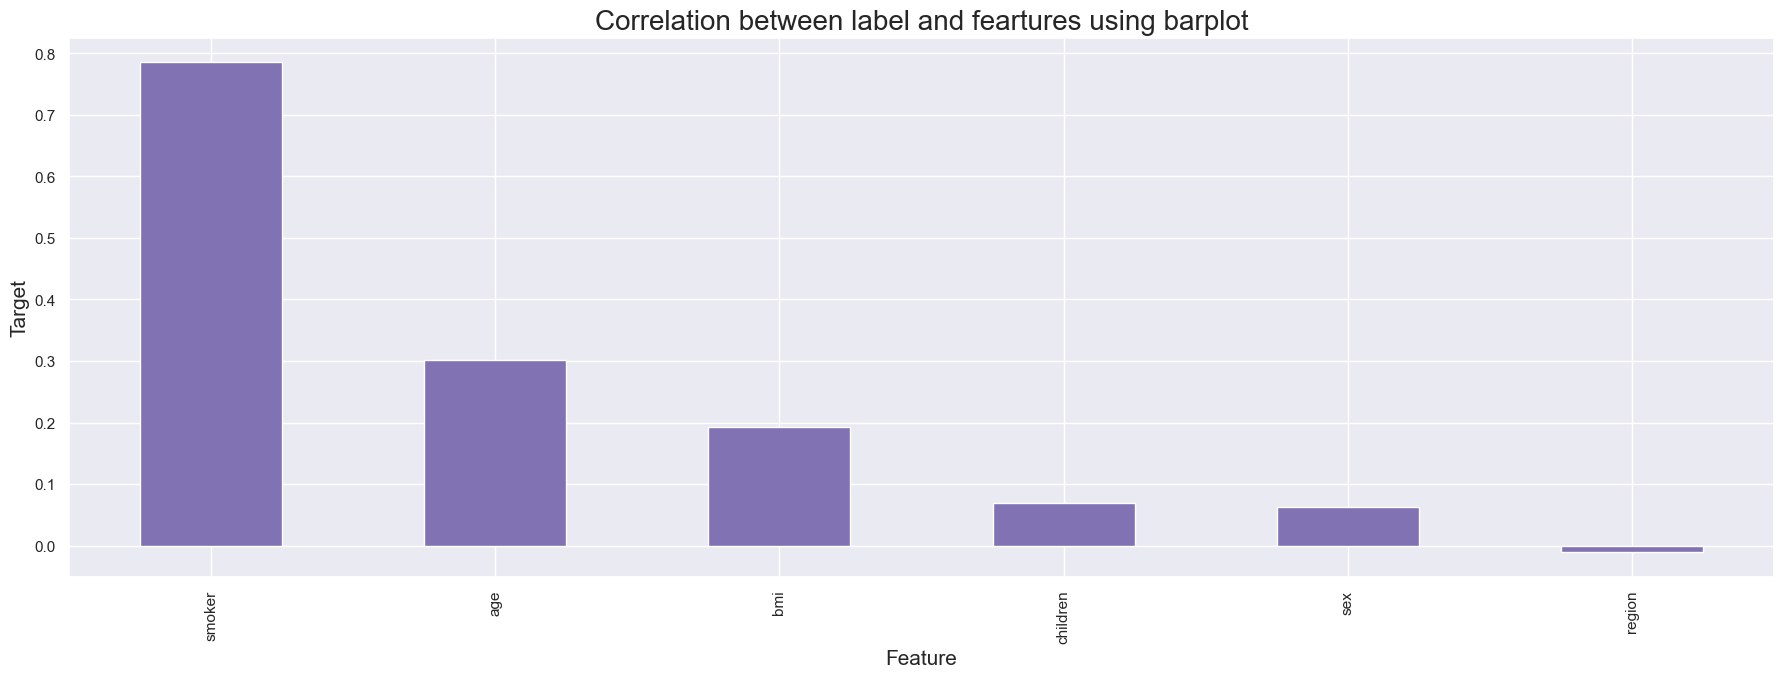

In [98]:
plt.figure(figsize=(22,7))
df1.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize =15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between label and feartures using barplot",fontsize=20)
plt.show()

Here we can see that  region column is very low correlation to each other

# Split the features and target

In [99]:
# Separating the independent and target varaible into x and y
x = df1.drop(['charges'], axis=1)  # Features we remove both charges and log_charges
y = df1['charges']    #  Here now the log charges is my target variable
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (1329, 6)
Label Dimensions (1329,)


In [100]:
print(x)

      age  sex     bmi  children  smoker  region
0      19  0.0  27.900         0     1.0     3.0
1      18  1.0  33.770         1     0.0     2.0
2      28  1.0  33.000         3     0.0     2.0
3      33  1.0  22.705         0     0.0     1.0
4      32  1.0  28.880         0     0.0     1.0
...   ...  ...     ...       ...     ...     ...
1333   50  1.0  30.970         3     0.0     1.0
1334   18  0.0  31.920         0     0.0     0.0
1335   18  0.0  36.850         0     0.0     2.0
1336   21  0.0  25.800         0     0.0     3.0
1337   61  0.0  29.070         0     1.0     1.0

[1329 rows x 6 columns]


In [101]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64


# Feature scaling  using standard scalirization

In [102]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Create a copy of the original DataFrame (for demonstration)
original_x = x.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the DataFrame 'x' using StandardScaler
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

# Perform some operations on the scaled data (for demonstration)
# Example: Multiply each feature by 2
x_scaled = x_scaled * 2


# 'x_restored' now contains the original values of 'x' before scaling
print("Original DataFrame (x):")
print(original_x)
print("\nDataFrame after scaling and operation (x_scaled):")
print(x_scaled)


Original DataFrame (x):
      age  sex     bmi  children  smoker  region
0      19  0.0  27.900         0     1.0     3.0
1      18  1.0  33.770         1     0.0     2.0
2      28  1.0  33.000         3     0.0     2.0
3      33  1.0  22.705         0     0.0     1.0
4      32  1.0  28.880         0     0.0     1.0
...   ...  ...     ...       ...     ...     ...
1333   50  1.0  30.970         3     0.0     1.0
1334   18  0.0  31.920         0     0.0     0.0
1335   18  0.0  36.850         0     0.0     2.0
1336   21  0.0  25.800         0     0.0     3.0
1337   61  0.0  29.070         0     1.0     1.0

[1329 rows x 6 columns]

DataFrame after scaling and operation (x_scaled):
           age       sex       bmi  children    smoker    region
0    -2.877528 -2.016623 -0.891339 -1.815879  3.951738  2.688386
1    -3.019952  1.983514  1.092533 -0.159528 -1.012213  0.880256
2    -1.595709  1.983514  0.832298  3.153174 -1.012213  0.880256
3    -0.883588  1.983514 -2.647083 -1.815879 -1.0122

In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["Vif Values"] = [variance_inflation_factor(x_scaled.values,i)for i in range (len(x_scaled.columns))]
vif["Features"] = x_scaled.columns
vif

,Vif Values,Features
0,1.016476,age
1,1.008922,sex
2,1.040761,bmi
3,1.002702,children
4,1.007041,smoker
5,1.025432,region


In [104]:
x_restored = pd.DataFrame(scaler.inverse_transform(x_scaled), columns=x.columns)
x

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


# Find the best Model

In [105]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

# Creating train test split

In [108]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    
    # Initializing and training the Gradient Boosting Regressor
    GBR = RandomForestRegressor()
    GBR.fit(x_train, y_train)
    pred = GBR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_State",maxRS)

Maximum r2 score is  0.8939398392407882 on Random_State 75


In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=75)

In [123]:
x_train

,age,sex,bmi,children,smoker,region
781,18,1.0,41.140,0,0.0,2.0
250,18,1.0,17.290,2,1.0,0.0
202,60,0.0,24.035,0,0.0,1.0
465,30,0.0,28.380,1,1.0,2.0
592,20,1.0,31.130,2,0.0,2.0
...,...,...,...,...,...,...
1057,45,0.0,31.790,0,0.0,2.0
137,22,1.0,25.175,0,0.0,1.0
19,30,1.0,35.300,0,1.0,3.0
370,61,0.0,21.090,0,0.0,1.0


In [124]:
y_train

781      1146.79660
250     12829.45510
202     13012.20865
465     19521.96820
592      2566.47070
           ...     
1057    17929.30337
137      2045.68525
19      36837.46700
370     13415.03810
249      4040.55825
Name: charges, Length: 930, dtype: float64

In [125]:
x_test

,age,sex,bmi,children,smoker,region
433,60,0.0,30.50,0,0.0,3.0
545,49,1.0,25.84,2,1.0,1.0
980,54,1.0,25.46,1,0.0,0.0
265,46,1.0,42.35,3,1.0,2.0
1275,57,1.0,23.70,0,0.0,3.0
...,...,...,...,...,...,...
1000,30,1.0,22.99,2,1.0,1.0
1054,27,0.0,21.47,0,0.0,1.0
1309,41,1.0,32.20,2,0.0,3.0
1046,43,0.0,25.08,0,0.0,0.0


In [126]:
y_test

433     12638.19500
545     23807.24060
980     25517.11363
265     46151.12450
1275    10959.33000
           ...     
1000    17361.76610
1054     3353.47030
1309     6875.96100
1046     7325.04820
355     24603.04837
Name: charges, Length: 399, dtype: float64

In [127]:
# Assuming x_test, y_test, x_train, y_train are your datasets
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_test shape: (399, 6)
y_test shape: (399,)
x_train shape: (930, 6)
y_train shape: (930,)


In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

# Linear Regression

In [129]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train= LR.predict(x_train)
print(LR)
print("R2_Score: ",r2_score(y_test,pred_LR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_LR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

LinearRegression()
R2_Score:  0.8108097860053864
R2_Score on training Data:  71.81960600028556
Mean Absolute error:- 4051.056245836209
Mean Squared error:- 29871834.704312347
Root Mean Squared Error:- 5465.513215088986


# Random Forest regressor

In [130]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_RFR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_Score:  0.8915526897609005
R2_Score on training Data:  96.92634211743488
Mean Absolute error:- 2444.7939520343693
Mean Squared error:- 17123085.053870138
Root Mean Squared Error:- 4138.004960590325


# K Neighbors Regressor

In [131]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_knn))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_knn))
print("Mean Squared error:-",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.1980299756799747
R2_Score on training Data:  38.639379921715346
Mean Absolute error:- 8087.496752099249
Mean Squared error:- 126625555.82807896
Root Mean Squared Error:- 11252.802132272607


# Gradient Booster Regressor

In [132]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train= GBR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_GBR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_Score:  0.9190861119573734
R2_Score on training Data:  88.26476386418814
Mean Absolute error:- 2160.8897455707383
Mean Squared error:- 12775746.8944001
Root Mean Squared Error:- 3574.317682355627


# Decision Tree Regressor

In [133]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_dtr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))


R2_Score:  0.7584531179938213
R2_Score on training Data:  99.79603710431934
Mean Absolute error:- 2935.252962581454
Mean Squared error:- 38138592.79653883
Root Mean Squared Error:- 6175.645132011621


# Support Vector Regressor

In [134]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_svr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_svr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  -0.06778427908263951
R2_Score on training Data:  -8.942026477036658
Mean Absolute error:- 8603.36659454409
Mean Squared error:- 168595800.0212847
Root Mean Squared Error:- 12984.4445403446


# Checking cross validation score

In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
score=cross_val_score(LR,x,y,cv=5,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.76260833 0.71182049 0.77313952 0.72863069 0.75664946]
0.7465696971497524
Difference between R2 score and cross validation score is- 6.424008885563404


In [137]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.85469502 0.77276128 0.86149134 0.8272245  0.85174637]
0.8335837014062001
Difference between R2 score and cross validation score is- 5.796898835470044


In [138]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_knn)-score2.mean())*100)

[0.14393455 0.04349083 0.04861509 0.14506057 0.17066852]
0.11035391106991052
Difference between R2 score and cross validation score is- 8.76760646100642


In [139]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.87608442 0.79404351 0.88876466 0.84508821 0.86065768]
0.8529276970118256
Difference between R2 score and cross validation score is- 6.615841494554786


In [140]:
score5 = cross_val_score(svr,x,y)
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_svr)-score.mean())*100)

[0.76260833 0.71182049 0.77313952 0.72863069 0.75664946]
0.7465696971497524
Difference between R2 score and cross validation score is- -81.4353976232392


From difference between R2 score and cross validation score computed on R2 socre we can say that gradient booster regressor as our best fiiting and best performing model

# Now Guessing best model

In [143]:
# Train the KNN regressor
GBR.fit(x_train, y_train)


GradientBoostingRegressor()

In [145]:
# Make predictions
y_pred = GBR.predict(x_test)


In [146]:
from sklearn.metrics import r2_score, mean_squared_error

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


R2 Score: 0.9186338045797735
Mean Squared Error: 12847163.121137874


# Now saving the model using joblib library

In [149]:
# Saving the model
import joblib
joblib.dump(GBR,"Medical_cost_insurance.pkl")

['Medical_cost_insurance.pkl']

In [150]:
# Open the file
import pickle
filename = "Medical_cost_insurance.pkl"
pickle.dump(GBR, open(filename,'wb'))  #Saved model

In [151]:
load_model = pickle.load(open("Medical_cost_insurance.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

91.86338045797736


In [152]:
# Here the values is come in this type because we have reduced the skewness of the charges column 
# so thats why value is predict this type
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,389,390,391,392,393,394,395,396,397,398
Predicted,14476.505523,24078.571747,13329.733263,44914.170254,11839.374229,6173.33958,3139.653322,17094.397486,4165.000095,5774.485077,...,7674.033293,47371.995103,14430.632762,37338.812651,5893.073678,18955.209058,4163.277463,7050.875966,10072.925142,8720.697294
Original,12638.195000,23807.240600,25517.113630,46151.124500,10959.330000,2719.27975,2150.469000,14474.675000,2396.095900,3875.734100,...,4667.607650,48173.361000,13635.637900,38344.566000,2404.733800,17361.766100,3353.470300,6875.961000,7325.048200,24603.048370


# Here we predict medical insurance cost

In [155]:
import numpy as np

# Define input data (medical characteristics)
input_data = np.array([[61,0.0,29.070,0,1.0,1.0]])  # Example input data (single sample)

# Make prediction using the trained SVR model
prediction = GBR.predict(input_data)  # Use 'svr' for prediction
print("Input Data:", input_data)
print("Predicted Insurance Cost:", prediction)

Input Data: [[61.    0.   29.07  0.    1.    1.  ]]
Predicted Insurance Cost: [29761.92022784]


# THANK YOU